IMPORTING LIBRARIES

In [1]:
!pip install pydotplus

  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24551 sha256=f98f36ba7d5292a00f4ac89f33a4b6cbf0d91671e19d8db50f67061b5a4de89f
  Stored in directory: /Users/vidhyakar/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image  
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


Reading the Data

In [5]:
df_admissions = pd.read_csv('Admission_predict.csv')

In [6]:
df_admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,9.650000,1,1
1,2,324,107,4,4.000000,4.500000,8.870000,1,1
2,3,316,104,3,3.000000,3.500000,8.000000,1,0
3,4,322,110,3,3.500000,2.500000,8.670000,1,1
4,5,314,103,2,2.000000,3.000000,8.210000,0,0


Checking for Data-types

In [8]:
df_admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.3 KB


In [9]:
df_admissions.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df_admissions.duplicated().sum()

0

In [12]:
df_admissions['Research'] = df_admissions['Research'].astype(object)

Removing Insignificant Variables

In [13]:
df_admissions = df_admissions.drop('Serial No.', axis = 1)

Checking the Distribution of Variables

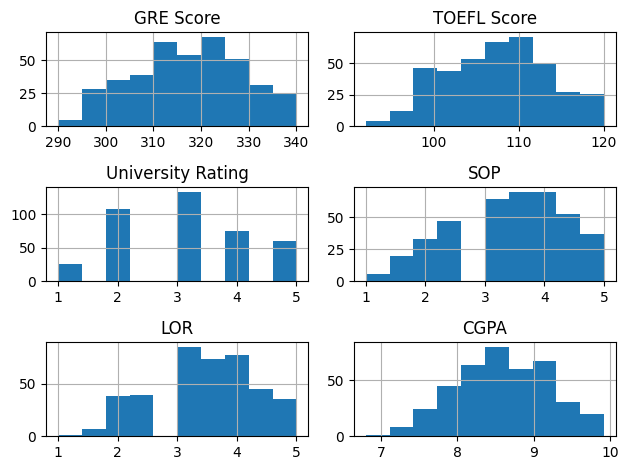

Skewness:


GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: object

In [14]:
df_admissions.drop('Chance of Admit', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:')
df_admissions.drop('Chance of Admit', axis = 1).skew()

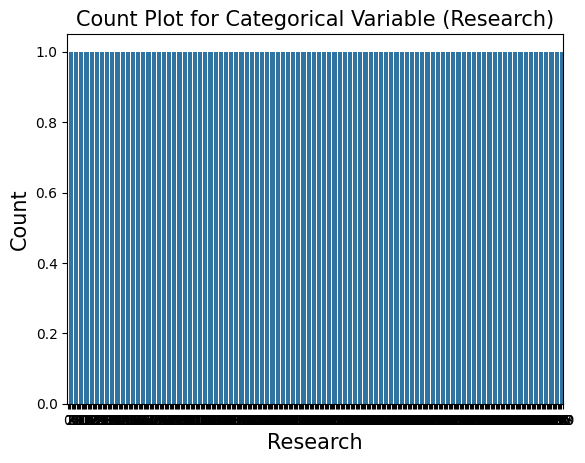

In [17]:
sns.countplot(df_admissions.Research)
plt.title('Count Plot for Categorical Variable (Research)', fontsize = 15)
plt.xlabel('Research', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

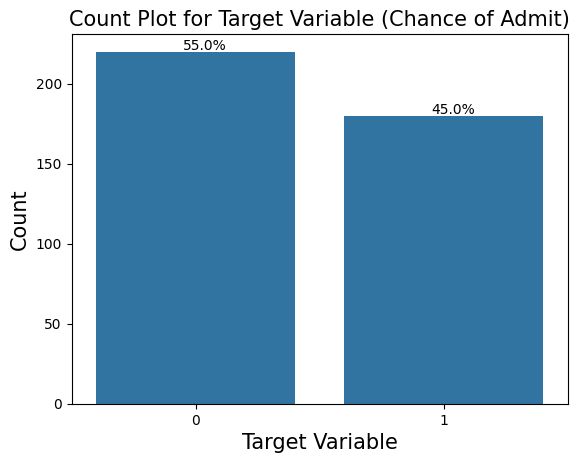

In [18]:

df_target = df_admissions['Chance of Admit'].copy()
df_target.value_counts()
sns.countplot(x = df_target)
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable (Chance of Admit)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Preparing the Data for Fitting into ML-Model

In [19]:
df_target = df_admissions['Chance of Admit']
df_feature = df_admissions.drop('Chance of Admit', axis = 1)

In [20]:
df_num = df_feature.select_dtypes(include = [np.number])
df_num.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

In [21]:
df_cat = df_feature.select_dtypes(include = [object])
df_cat.columns

Index(['Research'], dtype='object')

Encoding the Categorical Variable

In [22]:
dummy_var = pd.get_dummies(data = df_cat, drop_first = True , dtype = 'int8' )

In [23]:
X = pd.concat([df_num, dummy_var], axis = 1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,337,118,4,4.500000,4.500000,9.650000,1
1,324,107,4,4.000000,4.500000,8.870000,1
2,316,104,3,3.000000,3.500000,8.000000,1
3,322,110,3,3.500000,2.500000,8.670000,1
4,314,103,2,2.000000,3.000000,8.210000,0


Test-Train Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 7)
y_train (320,)
X_test (80, 7)
y_test (80,)


Creating Defined Functions

In [25]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [26]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return((classification_report(y_test, test_pred)) )

In [27]:
def get_confusion_matrix(model):
    test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, test_pred)
    return cm 

Logestic Regression

In [28]:
logreg_model = LogisticRegression()
logestic_model = logreg_model.fit(X_train,y_train)

In [29]:
train_report = get_train_report(logestic_model)
print('Train Report:\n', train_report)

Train Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       178
           1       0.86      0.82      0.84       142

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



In [32]:
test_report  = get_test_report(logestic_model)
print('Test Report:\n', test_report)


Test Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.75      0.79      0.77        38

    accuracy                           0.78        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.78      0.78        80



In [30]:
cm = get_confusion_matrix(logestic_model)
cm

array([[32, 10],
       [ 8, 30]])

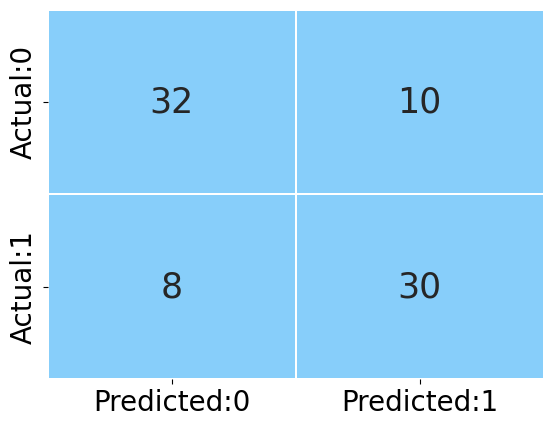

In [31]:
cm = get_confusion_matrix(logreg_model)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

Decision Tree 

In [33]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [34]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       142

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [35]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.78      0.82      0.79        38

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



Finding the Best Parameters using GridSearchCV for Decision Tree

In [36]:

tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 2} 



In [37]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
dt_model = dt_model.fit(X_train, y_train)

In [38]:
print('Classification Report for train set: \n', get_train_report(dt_model))

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       178
           1       0.93      0.74      0.82       142

    accuracy                           0.86       320
   macro avg       0.88      0.85      0.85       320
weighted avg       0.87      0.86      0.86       320



In [39]:
print('Classification Report for test set: \n', get_test_report(dt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.82      0.84      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



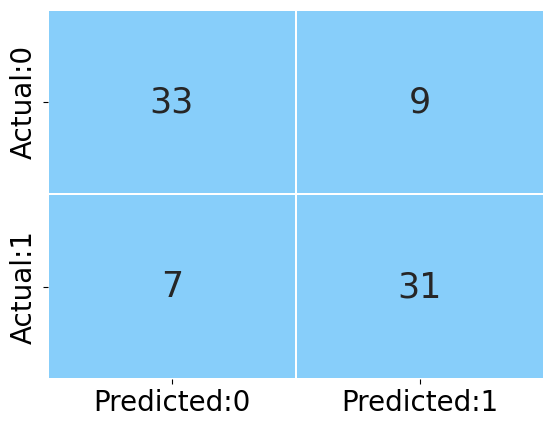

In [40]:
cm = get_confusion_matrix(decision_tree)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

Random Forest

In [41]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [42]:

train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       178
           1       1.00      0.99      0.99       142

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [43]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        42
           1       0.77      0.87      0.81        38

    accuracy                           0.81        80
   macro avg       0.82      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



Finding the Best Parameters using GridSearchCV for Random Forest 

In [45]:

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)\
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50} 



In [48]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)
rf_model = rf_model.fit(X_train, y_train)


print('Classification Report for test set:\n', get_train_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       178
           1       0.92      0.87      0.90       142

    accuracy                           0.91       320
   macro avg       0.91      0.91      0.91       320
weighted avg       0.91      0.91      0.91       320



In [49]:
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.80      0.87      0.84        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80



In [47]:
cm = get_confusion_matrix(rf_model)
cm

array([[34,  8],
       [ 5, 33]])

Identifying Important Features

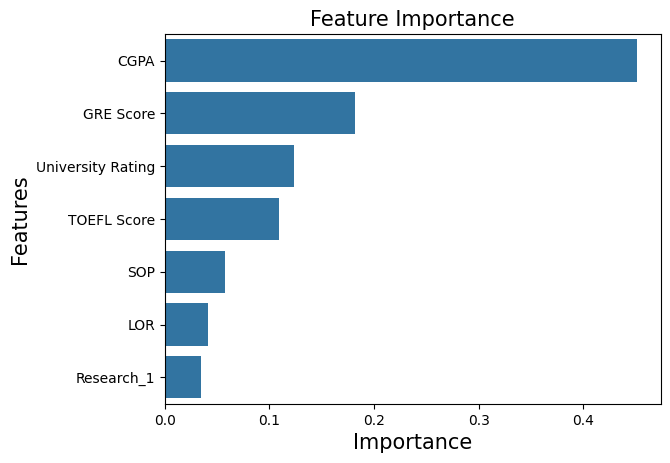

In [50]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()